# Data preprocessing

In [8]:
# imporing necessary modules and dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
dataframe.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
# selecting important features

dataframe = dataframe[["Age", "Height", "Weight", "FAVC", "CH2O", "FAF", "MTRANS", "NObeyesdad"]]
dataframe.head()

,Age,Height,Weight,FAVC,CH2O,FAF,MTRANS,NObeyesdad
0,21.0,1.62,64.0,no,2.0,0.0,Public_Transportation,Normal_Weight
1,21.0,1.52,56.0,no,3.0,3.0,Public_Transportation,Normal_Weight
2,23.0,1.80,77.0,no,2.0,2.0,Public_Transportation,Normal_Weight
3,27.0,1.80,87.0,no,2.0,2.0,Walking,Overweight_Level_I
4,22.0,1.78,89.8,no,2.0,0.0,Public_Transportation,Overweight_Level_II


In [11]:
# renaming the features

dataframe = dataframe.rename({"FAVC": "Consumes_high_caloric_food_frequently"}, axis=1)
dataframe = dataframe.rename({"CH2O": "Litres_of_water_per_day"}, axis=1)
dataframe = dataframe.rename({"FAF": "Physical_activities_in_a_day"}, axis=1)
dataframe = dataframe.rename({"MTRANS": "Means_of_transport"}, axis=1)
dataframe = dataframe.rename({"NObeyesdad": "Obesity_level"}, axis=1)

dataframe.head()

,Age,Height,Weight,Consumes_high_caloric_food_frequently,Litres_of_water_per_day,Physical_activities_in_a_day,Means_of_transport,Obesity_level
0,21.0,1.62,64.0,no,2.0,0.0,Public_Transportation,Normal_Weight
1,21.0,1.52,56.0,no,3.0,3.0,Public_Transportation,Normal_Weight
2,23.0,1.80,77.0,no,2.0,2.0,Public_Transportation,Normal_Weight
3,27.0,1.80,87.0,no,2.0,2.0,Walking,Overweight_Level_I
4,22.0,1.78,89.8,no,2.0,0.0,Public_Transportation,Overweight_Level_II


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    2111 non-null   float64
 1   Height                                 2111 non-null   float64
 2   Weight                                 2111 non-null   float64
 3   Consumes_high_caloric_food_frequently  2111 non-null   object 
 4   Litres_of_water_per_day                2111 non-null   float64
 5   Physical_activities_in_a_day           2111 non-null   float64
 6   Means_of_transport                     2111 non-null   object 
 7   Obesity_level                          2111 non-null   object 
dtypes: float64(5), object(3)
memory usage: 132.1+ KB


In [13]:
# values in the output label

dataframe["Obesity_level"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [14]:
# excluding "insufficient_weight" as an output

dataframe = dataframe[dataframe["Obesity_level"] != "Insufficient_Weight"]
dataframe["Obesity_level"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
      dtype=object)

In [15]:
# inspecting values in the feature "means_of_transport"

dataframe["Means_of_transport"].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [16]:
# reducing the values to 3 to imptrove the performance and accuracy of the model

def clean_means_of_transport(x):
    if 'Public_Transportation' in x:
        return 'Public_Transportation'    
    if 'Walking' in x or 'Bike' in x:
        return 'Walking'
    return 'Private'

dataframe['Means_of_transport'] = dataframe['Means_of_transport'].apply(clean_means_of_transport)
dataframe["Means_of_transport"].unique()

array(['Public_Transportation', 'Walking', 'Private'], dtype=object)

In [17]:
dataframe.describe()

,Age,Height,Weight,Litres_of_water_per_day,Physical_activities_in_a_day
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000
mean,24.982522,1.703239,92.011227,2.028235,0.974825
std,6.457183,0.092250,23.529042,0.612087,0.844163
min,14.000000,1.450000,42.300000,1.000000,0.000000
25%,20.896442,1.630000,75.000000,1.627732,0.096315
50%,23.000000,1.700038,87.656029,2.000000,1.000000
75%,26.835887,1.770000,110.920908,2.509341,1.554275
max,61.000000,1.980000,173.000000,3.000000,3.000000


In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    1839 non-null   float64
 1   Height                                 1839 non-null   float64
 2   Weight                                 1839 non-null   float64
 3   Consumes_high_caloric_food_frequently  1839 non-null   object 
 4   Litres_of_water_per_day                1839 non-null   float64
 5   Physical_activities_in_a_day           1839 non-null   float64
 6   Means_of_transport                     1839 non-null   object 
 7   Obesity_level                          1839 non-null   object 
dtypes: float64(5), object(3)
memory usage: 129.3+ KB


In [19]:
# rounding off numerical data

dataframe['Age'] = dataframe['Age'].apply(lambda age : round(age))
dataframe['Height'] = dataframe['Height'].apply(lambda height : round(height, 2))
dataframe['Weight'] = dataframe['Weight'].apply(lambda weight : round(weight))
dataframe['Litres_of_water_per_day'] = dataframe['Litres_of_water_per_day'].apply(lambda litres_of_water_per_day : round(litres_of_water_per_day))
dataframe['Physical_activities_in_a_day'] = dataframe['Physical_activities_in_a_day'].apply(lambda physical_activities_in_a_day : round(physical_activities_in_a_day))

dataframe.head()

,Age,Height,Weight,Consumes_high_caloric_food_frequently,Litres_of_water_per_day,Physical_activities_in_a_day,Means_of_transport,Obesity_level
0,21,1.62,64,no,2,0,Public_Transportation,Normal_Weight
1,21,1.52,56,no,3,3,Public_Transportation,Normal_Weight
2,23,1.80,77,no,2,2,Public_Transportation,Normal_Weight
3,27,1.80,87,no,2,2,Walking,Overweight_Level_I
4,22,1.78,90,no,2,0,Public_Transportation,Overweight_Level_II


In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    1839 non-null   int64  
 1   Height                                 1839 non-null   float64
 2   Weight                                 1839 non-null   int64  
 3   Consumes_high_caloric_food_frequently  1839 non-null   object 
 4   Litres_of_water_per_day                1839 non-null   int64  
 5   Physical_activities_in_a_day           1839 non-null   int64  
 6   Means_of_transport                     1839 non-null   object 
 7   Obesity_level                          1839 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 129.3+ KB


# Data visualization

<AxesSubplot: xlabel='Obesity_level', ylabel='count'>

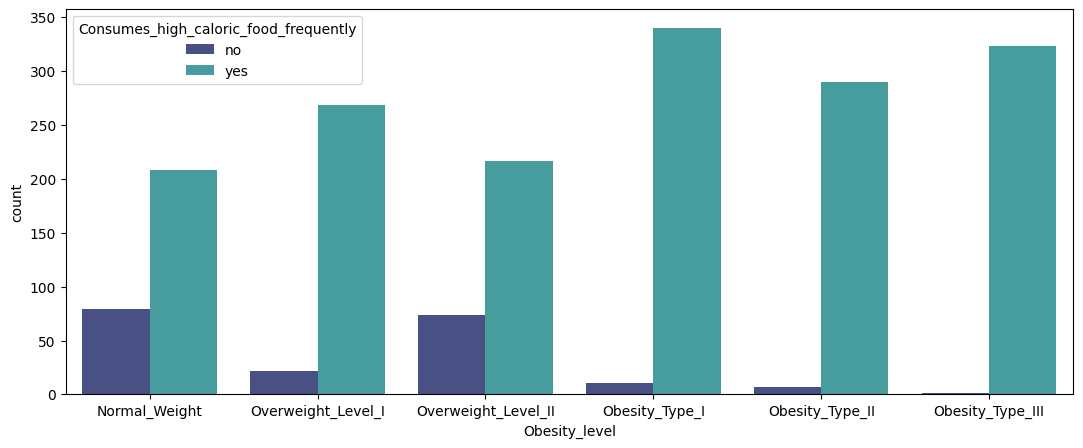

In [21]:
# relationship between individuals with obesity and their rate of calories consumption

plt.figure(figsize=(13,5))
sns.countplot(x='Obesity_level', hue='Consumes_high_caloric_food_frequently', data=dataframe, palette='mako')

<AxesSubplot: xlabel='Obesity_level', ylabel='count'>

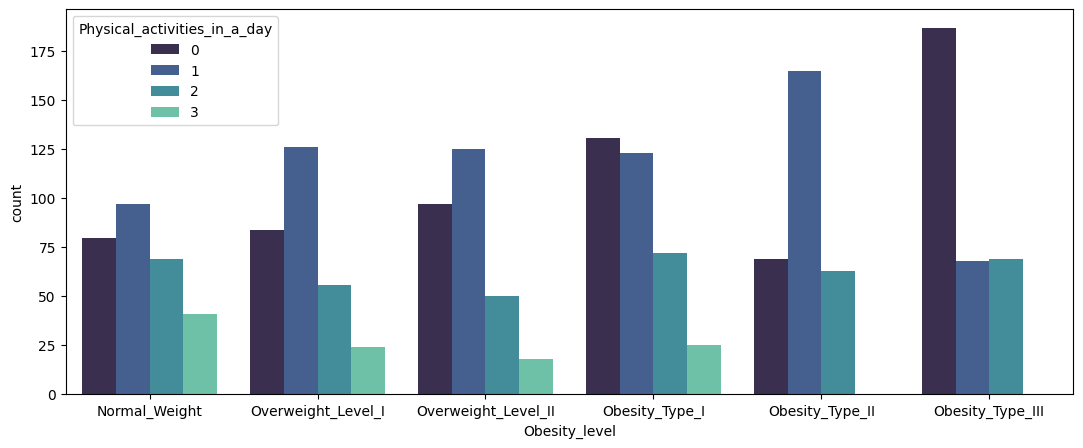

In [22]:
# relationship between individuals with obesity and the number of times they do physical activities in a day

plt.figure(figsize=(13,5)) 
sns.countplot(x='Obesity_level', hue='Physical_activities_in_a_day', data=dataframe, palette='mako')

# Model training

In [23]:
# necessary imports

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import numpy as np

## Encoding categorical data

### Encoding independent variables

In [24]:
# consumption of calories

le_calories = LabelEncoder()
dataframe['Consumes_high_caloric_food_frequently'] = le_calories.fit_transform(dataframe['Consumes_high_caloric_food_frequently'])
dataframe["Consumes_high_caloric_food_frequently"].unique()

array([0, 1])

In [25]:
# means of transport

le_transport = LabelEncoder()
dataframe['Means_of_transport'] = le_transport.fit_transform(dataframe['Means_of_transport'])
dataframe["Means_of_transport"].unique()

array([1, 2, 0])

### Encoding dependent variable

In [26]:
# obesity levels

# le_obesity = LabelEncoder()
# dataframe['Obesity_level'] = le_obesity.fit_transform(dataframe['Obesity_level'])
# dataframe["Obesity_level"].unique()

dataframe["Obesity_level"] = dataframe["Obesity_level"].map({'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2, 'Obesity_Type_I':3, 'Obesity_Type_II':4, 'Obesity_Type_III':5})

dataframe["Obesity_level"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

## Separating dependent and independent variables

In [27]:
X = dataframe.drop("Obesity_level", axis=1) # independent
y = dataframe["Obesity_level"] # dependent

X

,Age,Height,Weight,Consumes_high_caloric_food_frequently,Litres_of_water_per_day,Physical_activities_in_a_day,Means_of_transport
0,21,1.62,64,0,2,0,1
1,21,1.52,56,0,3,3,1
2,23,1.80,77,0,2,2,1
3,27,1.80,87,0,2,2,2
4,22,1.78,90,0,2,0,1
...,...,...,...,...,...,...,...
2106,21,1.71,131,1,2,2,1
2107,22,1.75,134,1,2,1,1
2108,23,1.75,134,1,2,1,1
2109,24,1.74,133,1,3,1,1


In [28]:
y

0       0
1       0
2       0
3       1
4       2
       ..
2106    5
2107    5
2108    5
2109    5
2110    5
Name: Obesity_level, Length: 1839, dtype: int64

In [29]:
dataframe.head()

,Age,Height,Weight,Consumes_high_caloric_food_frequently,Litres_of_water_per_day,Physical_activities_in_a_day,Means_of_transport,Obesity_level
0,21,1.62,64,0,2,0,1,0
1,21,1.52,56,0,3,3,1,0
2,23,1.80,77,0,2,2,1,0
3,27,1.80,87,0,2,2,2,1
4,22,1.78,90,0,2,0,1,2


## Splitting the dataset into Training set and Test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Decision Tree Classifier

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [33]:
print("Training accuracy: ", accuracy_score(y_train, train_predict))
print("Testing accuracy: ", accuracy_score(y_test, test_predict))

Training accuracy:  1.0
Testing accuracy:  0.9538043478260869


In [34]:
# plt.figure(figsize=(200,100))
# plot_tree(model,filled=True, feature_names=X.columns)
# plt.savefig("obesity_decision_tree")
# plt.show()

In [35]:
X

,Age,Height,Weight,Consumes_high_caloric_food_frequently,Litres_of_water_per_day,Physical_activities_in_a_day,Means_of_transport
0,21,1.62,64,0,2,0,1
1,21,1.52,56,0,3,3,1
2,23,1.80,77,0,2,2,1
3,27,1.80,87,0,2,2,2
4,22,1.78,90,0,2,0,1
...,...,...,...,...,...,...,...
2106,21,1.71,131,1,2,2,1
2107,22,1.75,134,1,2,1,1
2108,23,1.75,134,1,2,1,1
2109,24,1.74,133,1,3,1,1


In [36]:
# age height weight calories water physicalActivities transport

X = np.array([[30, 1.80, 40, "yes", 3, 3, "Public_Transportation" ]])
X

array([['30', '1.8', '40', 'yes', '3', '3', 'Public_Transportation']],
      dtype='<U32')

In [37]:
X[:, 3] = le_calories.transform(X[:,3])
X[:, -1] = le_transport.transform(X[:,-1])
X = X.astype(float)
X

array([[30. ,  1.8, 40. ,  1. ,  3. ,  3. ,  1. ]])

In [38]:
y_pred = model.predict(X)
y_pred

C:\Users\QUANTUM\Desktop\ML\project\oPenv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Saving the model for web integration

In [39]:
import pickle

data = {"model": model, "le_calories": le_calories, "le_transport": le_transport}
with open('obesity_predictor_model.pkl', 'wb') as file:
    pickle.dump(data, file)

with open('obesity_predictor_model.pkl', 'rb') as file:
    data = pickle.load(file)

classifier_loaded = data["model"]
le_calories = data["le_calories"]
le_transport = data["le_transport"]

y_pred = classifier_loaded.predict(X)
y_pred

C:\Users\QUANTUM\Desktop\ML\project\oPenv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)